In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import collections
import pandas as pd
import skimage.io
import scipy.io
import math
import cv2
from PIL import Image, ImageOps

import os
from os import path
import shutil

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

from random import sample
import seaborn as sns
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from keras.utils import plot_model
from scikitplot.metrics import plot_confusion_matrix as plt_con_mat

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

from tensorflow.keras.preprocessing.image import load_img,img_to_array

import random

from keras.utils.np_utils import to_categorical

import tensorflow as tf
import tensorflow_addons as tfa
import pathlib
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from keras.callbacks import ReduceLROnPlateau

import xgboost as xgb

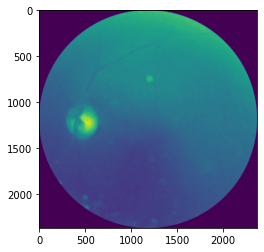

In [16]:
dataPath = "ocular_disease_fundus/ODIR-5K/ODIR-5K/Actual Training Images/cataracts-cropped"

img = cv2.imread(dataPath + "/1456_left.jpg',0)

plt.imshow(img)

In [23]:
def getImagesAndLabels(root):
    foldernames = [root+'normal-cropped/', root+'myopia-cropped/', root+'hypertension-cropped/',root+'glaucoma-cropped/',
                   root+'diabetes-cropped/',root+'cataracts-cropped/',root+'amd-cropped/']
    y = []
    X = []
    ROW = 224
    COL = 224

    for i in range(7):
        print("getting images and labels for " + foldernames[i])
        for imgName in os.listdir(foldernames[i]):

            image = cv2.imread(foldernames[i] + imgName)
            try:
                image = cv2.resize(image, (ROW, COL))
                X.append(np.array(image).flatten())
                y.append(i)
            except:
                print("huh")
                a=1


    return np.array(X), np.array(y)

X_train, y_train = getImagesAndLabels("ocular_disease_fundus/ODIR-5K/ODIR-5K/Actual Training Images/")
X_test, y_test = getImagesAndLabels("ocular_disease_fundus/ODIR-5K/ODIR-5K/Actual Testing Images/")

getting images and labels for ocular_disease_fundus/ODIR-5K/ODIR-5K/Actual Training Images/normal-cropped/
getting images and labels for ocular_disease_fundus/ODIR-5K/ODIR-5K/Actual Training Images/myopia-cropped/
getting images and labels for ocular_disease_fundus/ODIR-5K/ODIR-5K/Actual Training Images/hypertension-cropped/
getting images and labels for ocular_disease_fundus/ODIR-5K/ODIR-5K/Actual Training Images/glaucoma-cropped/
getting images and labels for ocular_disease_fundus/ODIR-5K/ODIR-5K/Actual Training Images/diabetes-cropped/
getting images and labels for ocular_disease_fundus/ODIR-5K/ODIR-5K/Actual Training Images/cataracts-cropped/
getting images and labels for ocular_disease_fundus/ODIR-5K/ODIR-5K/Actual Training Images/amd-cropped/
getting images and labels for ocular_disease_fundus/ODIR-5K/ODIR-5K/Actual Testing Images/normal-cropped/
getting images and labels for ocular_disease_fundus/ODIR-5K/ODIR-5K/Actual Testing Images/myopia-cropped/
getting images and labels for

In [71]:
xgboost = xgb.XGBClassifier(learning_rate =0.05,
 n_estimators=50,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softprob',
 nthread=4,
 scale_pos_weight=1,
                            
 seed=27).fit(X_train, y_train)

print('Cross Validation for XGBClassifier')
print(xgboost.score(X_test, y_test))

[01:51:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Cross Validation for XGBClassifier
0.43954604975993017


In [87]:
X_train.shape

(3326, 150528)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 70% training and 30% test

In [108]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=12)

In [109]:
clf = clf.fit(X_train,y_train)

In [110]:
clf.score(X_test, y_test)

0.42105263157894735

In [107]:
np.savetxt("X-small.csv", X_test, delimiter=",")
np.savetxt("y-small.csv", y_test, delimiter=",")

In [113]:
#XGBoost Model

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [132]:
preds = model.predict(X_test)
from sklearn.metrics import roc_auc_score, f1_score
print("f1 score: ", f1_score(preds, y_test, average='weighted'))
print("accuracy: ", model.score(X_test, y_test))

f1 score:  0.5311491372259195
accuracy:  0.5062277580071174


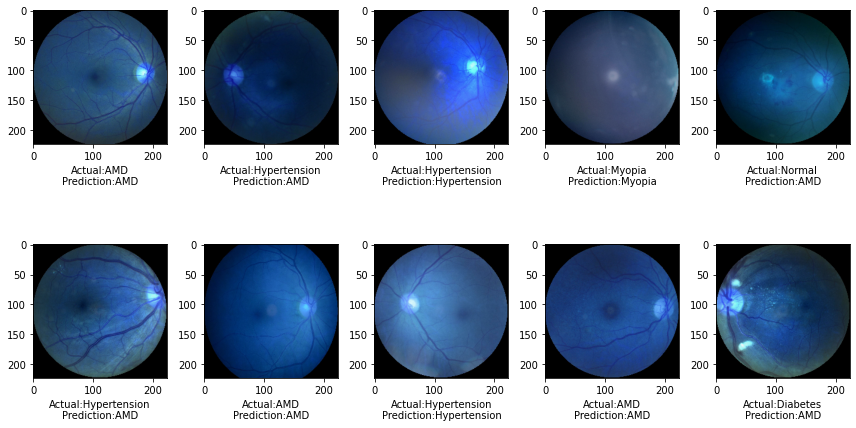

In [129]:
plt.figure(figsize=(12,7))
for i in range(10):
    foo= [317,1114,695,505,524,1021,680,141,879,235]
    samp = foo[i] #[603,1217,410,134,1092,187,87,89,989,429]
    #samp = random.choice(range(len(X_test)))
    #print(samp)
    image = X_test[samp]
    image = image.reshape(224,224,3)
    category = y_test[samp]
    pred_category = preds[samp]
    if category == 0:
        label = "AMD"
    elif category == 1:
        label = "Cataracts"
    elif category == 2:
        label = "Diabetes"
    elif category == 3:
        label = "Glaucoma"
    elif category == 4:
        label = "Hypertension"
    elif category == 5:
        label = "Myopia"
    elif category == 6:
        label = "Normal"
    if pred_category == 0:
        pred_label = "AMD"
    elif pred_category == 1:
        pred_label = "Cataracts"
    elif pred_category == 2:
        pred_label = "Diabetes"
    elif pred_category == 3:
        pred_label = "Glaucoma"
    elif pred_category == 4:
        pred_label = "Hypertension"
    elif pred_category == 5:
        pred_label = "Myopia"
    elif pred_category == 6:
        pred_label = "Normal"

    plt.subplot(2,5,i+1)
    plt.imshow(image, cmap = "gray")
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout()